# ECMB pole analysis

This notebook compares the new ECMB pole to other Paleoproterozoic poles.

This Jupyter notebook accompanies the paper:

Swanson-Hysell et al. 2021 **The paleogeography of Laurentia in its early years: new constraints from the Paleoproterozoic East Central Minnesota batholith**

## Import scientific python packages

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.feature import NaturalEarthFeature, COLORS

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as ET
from matplotlib.cm import get_cmap

def make_mollweide_map(central_longitude=0, figsize=(8, 8),
                       grid_lines=True,
                       lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                                 0.,   30.,   60., 90.,  120.,  150.,  180.],
                       lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns a Mollweide map projection using cartopy

    Example
    -------
    >>> map_axis = make_mollweide_map(central_longitude=200)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is True)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.Mollweide(central_longitude=central_longitude)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid)
    return ax

def make_orthographic_map(central_longitude=0, central_latitude=0, figsize=(8, 8),
                          grid_lines=True,
                          lat_grid=[-80.,  -60.,  -30.,
                                    0.,   30.,   60., 80.],
                          lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.]):
    '''
    Function creates and returns an orthographic map projection using cartopy

    Example
    -------
    >>> map_axis = make_orthographic_map(central_longitude=200,central_latitude=30)

    Optional Parameters
    -----------
    central_longitude : central longitude of projection (default is 0)
    central_latitude : central latitude of projection (default is 0)
    figsize : size of the figure (default is 8x8)
    add_land : chose whether land is plotted on map (default is true)
    land_color : specify land color (default is 'tan')
    add_ocean : chose whether land is plotted on map (default is False, change to True to plot)
    ocean_color : specify ocean color (default is 'lightblue')
    grid_lines : chose whether gird lines are plotted on map (default is true)
    lat_grid : specify the latitude grid (default is 30 degree spacing)
    lon_grid : specify the longitude grid (default is 30 degree spacing)
    '''
    fig = plt.figure(figsize=figsize)
    map_projection = ccrs.Orthographic(
        central_longitude=central_longitude, central_latitude=central_latitude)
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return ax

## Import poles

In [2]:
Laurentia_poles = pd.read_csv('../Data/pole_compilations/Leirubakki_poles_w_PlateID.csv')
L_poles_1700_1800 = Laurentia_poles[(Laurentia_poles['nominal age'] > 1700) & (Laurentia_poles['nominal age'] < 1830)]

NED_pole = {'dec': 265.8158044859281,
 'inc': 20.48669733354535,
 'n': 23,
 'r': 22.51800539199423,
 'k': 45.64366412940581,
 'alpha95': 4.528967055678733,
 'csd': 11.989325978336389}

In [3]:
L_poles_1700_1800

,Terrane,ROCKNAME,-10.3,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,f,INCf,PLATf,PLONf,DPf,DMf,A95f,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Overlap_Comment,Pole_citation_code,Geochron_citation_code,Notes_Changes_from_Leirubakki,Plate_ID
33,Laurentia-Rae,Sparrow Dykes,2642,NaN,"Co,Ro",0.0,61.599998,250.199997,10.0,54.0,131.000000,51.000000,51.000000,50.0,7.0,12.0,291.000000,6.6,9.4,7.876547,1.0,51.000000,12.0,291.000000,6.6,9.4,7.876547,20,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,5.0,B,1827.0,1823.0,1831.0,"1827±4, new",Sparrow Dykes,"McGlynn,J.C., Hanson,G.N., Irving,E., Park,J.K.",1974.0,Canad.J.Earth Sci.,11,30-42,Paleomagnetism and age of Nonacho Group Sandst...,Overlaps with Siluro-Devonian path,\cite{McGlynn1974a},NaN,NaN,10640
34,Laurentia-Rae,Martin Formation,2659,NaN,"F+,Ro",100.0,59.599998,251.400002,15.0,56.0,322.500000,-29.400000,29.400000,15.0,10.4,-9.0,288.000000,6.3,11.5,8.511757,0.6,-43.200000,-0.2,104.800000,8.0,12.9,10.200000,60,2.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,A,1818.0,1814.0,1822.0,"1818±4, NEW",Martin Formation,"Evans,M.E., Bingham,D.K.",1973.0,Canad.J.Earth Sci.,10,1485-1493,Paleomagnetism of the Precambrian Martin Forma...,Overlaps with Siluro-Devonian path,\cite{Evans1973a},NaN,NaN,10640
35,Laurentia,Dubawnt Group,2737,NaN,"C+,Rc",100.0,64.099998,265.599998,30.0,130.0,347.000000,-50.000000,50.000000,17.0,7.0,7.0,277.000000,8.0,8.0,8.000000,0.6,-63.300000,-19.4,95.300000,8.7,11.0,9.800000,63,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,6.0,B,1780.0,1750.0,1820.0,possibly ca.1750 ovp (Th.Raub 08 PhD thesis); ...,Dubawnt Group,"Park,J.K., Irving,E., Donaldson,J.A.",1973.0,Geol.Soc.Amer.Bull.,84,859-870,Paleomagnetism of the Dubawnt Group,Overlaps with a Devonian pole,\cite{Park1973a},NaN,NaN,10640
36,Laurentia,ECMB dikes,NaN,NaN,C*+ (baked contact test with intruding MCR dik...,0.0,45.530000,-94.260000,23.0,NaN,NaN,NaN,NaN,NaN,NaN,21.2,265.100000,NaN,NaN,4.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,1779.0,1776.0,1782.0,U-Pb zircon dates on ECMB granites,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10023
37,Laurentia-Trans-Hudson orogen,Deschambault Pegmatites,8889,NaN,NaN,0.0,54.900002,256.699997,18.0,168.0,28.299999,82.099998,82.099998,77.5,4.0,67.5,276.000000,7.6,7.8,7.699351,1.0,82.099998,67.5,276.000000,7.6,7.8,7.699351,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,5.0,B,1766.0,1761.0,1771.0,", GPMDB4.6",Deschambault Pegmatites,"Symons, D.T.A., Symons, T.B., Lewchuk, M.T.",2000.0,Phys.Chem.Earth(A),25,479-487,Paleomagnetism of the Deschambault Pegmatites:...,NaN,\cite{Symons2000a},not directly dated; dated elsewhere in domain ...,NaN,1000
38,Laurentia-Trans-Hudson orogen,Jan Lake Granite,new,A component,NaN,0.0,54.900002,257.199997,10.0,1000.0,166.700000,73.200000,73.200000,27.6,10.0,24.3,264.300000,16.0,17.9,16.923357,1.0,73.200000,24.3,264.300000,16.0,17.9,16.923357,0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,B,1758.0,1757.0,1759.0,"1758±1, Bickford+05",Jan Lake Granite,"Gala,M.G., Symons,D.T.A., Palmer,H.C.",1995.0,"Saskatchewan Geol.Surv.Misc.Rpt., 95-4",NaN,145-152,"Paleomagnetism of the Jan Lake Granite, Trans-...",NaN,\cite{Gala1995a},\cite{Bickford2005a},Gala et al. 1995 make a division between VGPs ...,1000
39,Laurentia,Cleaver Dykes,9139,NaN,"C+, C*+",0.0,67.500000,241.970001,17.0,102.0,136.500000,57.400002,57.400002,64.0,4.5,19.4,276.700012,6.1,6.1,6.100000,1.0,57.400002,19.4,276.700012,6.1,6.1,6.100000,0or100,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,6.0,A,1740.5,1736.0,1745.0,"ok, GPMDB4.6",Cleaver Dykes,"Irving,E., Baker,J., M. Hamilton,M., Wynne,P.J.",2004.0,Precambrian Res.,129,251-270,Early Proterozoic geomagnetic field in western...,NaN,\cite{Irving2004a},NaN,NaN,10041


There are two main poles for Laurentia that the ECMB pole can be compared to:
- 1759 ± 1 Ma post-orogenic Jan Lake Granite from the Hudsonian Orogen in southeast Saskatchewan published by Gala et al. (1995). Gala et al. 1995 make a division between VGPs based on their directions. This division doesn't correspond to lithology. They calculate two distinct poles (as well as an overall mean pole). It is unclear which one of these should be paired with the 1758± Bickford et al. (2005) date. The A grouping was chosen in the Nordic compilation likely based on the interpretation of Irving et al. 2004 who interpreted it this way: 
    > “A” is based, in part, on some excellent square-shouldered demagnetization curves with TUB’s about 550 ◦C. We suggest that it, like Cleaver magnetization, is most likely a TRM acquired at the time of intrusion, namely, approximately 1759 Ma.''
- post-orogenic subvertical Cleaver Dykes from the Great Bear Magmatic Arc that have a U–Pb (baddeleyite) date of 1740 +5/−4 Ma

In [4]:
print('Jan Lake A pole')
print(pmag.dia_vgp(166.7,73.2,10,54.9,257.2))
print('Jan Lake B pole')
print(pmag.dia_vgp(26.3,80.3,6.8,54.9,257.2))

Jan Lake A pole
(264.69550731205237, 24.2750067695418, 15.992091732360416, 17.884122417586177)
Jan Lake B pole
(282.2386203062834, 70.20528818466133, 12.532644624039612, 13.055419062095968)


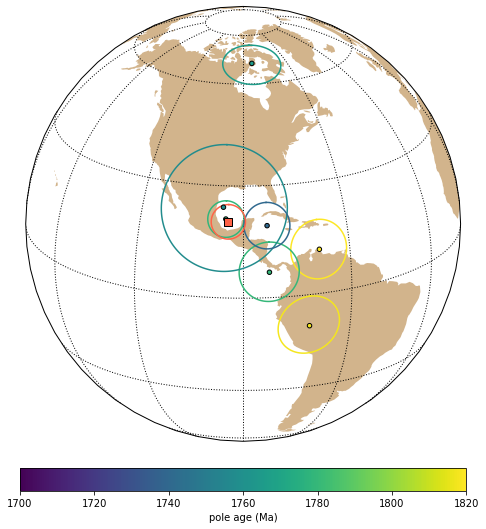

In [5]:
map_axis = ipmag.make_orthographic_map(central_longitude=-90,central_latitude=20,figsize=(10,10),
                                       land_edge_color=None)

ipmag.plot_poles_colorbar(map_axis,L_poles_1700_1800['PLONG'].tolist(),L_poles_1700_1800['PLAT'].tolist(),
                          L_poles_1700_1800['A95'].tolist(),L_poles_1700_1800['nominal age'].tolist(),
                          1700,1820,marker='o',colorbar=True,colormap='viridis')

ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                marker='s',color='tomato',markersize=50,label='ECMB mean pole')

In [6]:
Sparrow_pole = L_poles_1700_1800[L_poles_1700_1800['ROCKNAME']=='Sparrow Dykes']
Martin_pole = L_poles_1700_1800[L_poles_1700_1800['ROCKNAME']=='Martin Formation']
Dubawnt_pole = L_poles_1700_1800[L_poles_1700_1800['ROCKNAME']=='Dubawnt Group']
Deschambault_pole = L_poles_1700_1800[L_poles_1700_1800['ROCKNAME']=='Deschambault Pegmatites']
Jan_pole = L_poles_1700_1800[L_poles_1700_1800['ROCKNAME']=='Jan Lake Granite']
Cleaver_pole = L_poles_1700_1800[L_poles_1700_1800['ROCKNAME']=='Cleaver Dykes']

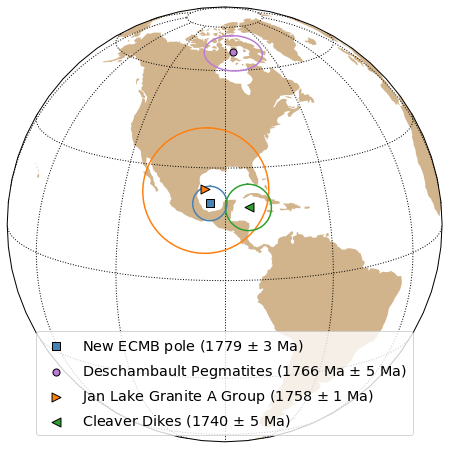

In [28]:
map_axis = ipmag.make_orthographic_map(central_longitude=270,central_latitude=15,
                                      land_edge_color=None)
ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],label='New ECMB pole (1779 $\pm$ 3 Ma)',marker='s',
                color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Deschambault_pole['PLONG'].values[0],Deschambault_pole['PLAT'].values[0],Deschambault_pole['A95'].values[0],
                color='#BB7AD6',label='Deschambault Pegmatites (1766 Ma $\pm$ 5 Ma)',markersize=50)
ipmag.plot_pole(map_axis,Jan_pole['PLONG'].values[0],Jan_pole['PLAT'].values[0],Jan_pole['A95'].values[0],
                label='Jan Lake Granite A Group (1758 $\pm$ 1 Ma)',marker='>',color='C1',markersize=80)
ipmag.plot_pole(map_axis,Cleaver_pole['PLONG'].values[0],Cleaver_pole['PLAT'].values[0],Cleaver_pole['A95'].values[0],
                label='Cleaver Dikes (1740 $\pm$ 5 Ma)',marker='<',color='C2',markersize=80)

plt.legend(fontsize='x-large',loc='lower center')
plt.savefig('visualizations/NED_pole_comparison.pdf')

## Import compilation of poles from Symons and Harris (2005)

A compilation of Trans-Hudson orogen paleomagnetic poles was published as Table 1 in Symons and Harris (2005). Raub (2008) interpretted the remanence ages assigned to this poles to largely be too old with Ar-Ar hornblende data in some cases constraining remanence to have been acquired at later times of cooling. The streaking of poles between the higher quality poles and present-day north is clear in this compilation.

In [9]:
Symons2005_poles = pd.read_csv('../data/pole_compilations/Symons2005_THO.csv')
Symons2005_poles = Symons2005_poles.drop(Symons2005_poles[Symons2005_poles.code == 'REC'].index) #Ordovician overprint
Symons2005_poles = Symons2005_poles.drop(Symons2005_poles[Symons2005_poles.code == 'MI'].index) #conglomerate (not a pole)
Symons2005_poles_THO = Symons2005_poles[Symons2005_poles.age < 1875]
Symons2005_poles_THO = Symons2005_poles_THO[Symons2005_poles_THO.A95 < 30]
Symons2005_poles_THO.reset_index(inplace=True)

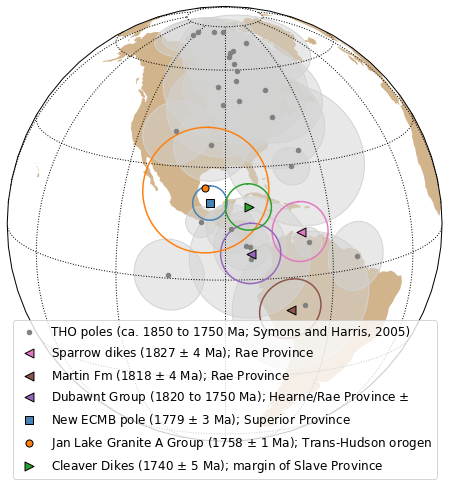

In [27]:
map_axis = ipmag.make_orthographic_map(central_longitude=270,central_latitude=15,
                                     land_edge_color=None)
#map_axis = ipmag.make_mollweide_map(central_longitude=270,figsize=(12, 12))
ipmag.plot_poles(map_axis,Symons2005_poles_THO.pole_lon,Symons2005_poles_THO.pole_lat,Symons2005_poles_THO.A95,
                 edgecolor=None,color='grey',fill_color='lightgrey',filled_pole=True,fill_alpha=0.5,label='THO poles (ca. 1850 to 1750 Ma; Symons and Harris, 2005)')

ipmag.plot_pole(map_axis,Sparrow_pole['PLONG'].values[0],Sparrow_pole['PLAT'].values[0],Sparrow_pole['A95'].values[0],
                label='Sparrow dikes (1827 $\pm$ 4 Ma); Rae Province',marker='<',color='C6',markersize=80)

ipmag.plot_pole(map_axis,Martin_pole['PLONG'].values[0],Martin_pole['PLAT'].values[0],Martin_pole['A95'].values[0],
                label='Martin Fm (1818 $\pm$ 4 Ma); Rae Province',marker='<',color='C5',markersize=80)

ipmag.plot_pole(map_axis,Dubawnt_pole['PLONG'].values[0],Dubawnt_pole['PLAT'].values[0],Dubawnt_pole['A95'].values[0],
                label='Dubawnt Group (1820 to 1750 Ma); Hearne/Rae Province $\pm$',marker='<',color='C4',markersize=80)

ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                label='New ECMB pole (1779 $\pm$ 3 Ma); Superior Province',marker='s',color='steelblue',markersize=50)

ipmag.plot_pole(map_axis,Jan_pole['PLONG'].values[0],Jan_pole['PLAT'].values[0],Jan_pole['A95'].values[0],
                label='Jan Lake Granite A Group (1758 $\pm$ 1 Ma); Trans-Hudson orogen',color='C1',markersize=50)

ipmag.plot_pole(map_axis,Cleaver_pole['PLONG'].values[0],Cleaver_pole['PLAT'].values[0],Cleaver_pole['A95'].values[0],
                label='Cleaver Dikes (1740 $\pm$ 5 Ma); margin of Slave Province',marker='>',color='C2',markersize=80)

plt.legend(fontsize='large',loc='lower center',bbox_to_anchor=(0.5, -0.1))
plt.savefig('visualizations/NED_pole_comparison_THO.pdf')

## Plot reconstructions

Building on the reconstruction of Swanson-Hysell (2021) the differential motion between the Superior Province and Slave Province can be reconstructed from 2212 to 1760 Ma when Laurentia is amalgamated. These reconstructions are generated in ECMB_reconsturctions_generate and plotted below with the poles. Two sets of reconstructions are generated with one showing all the poles within +/- 20 Myr of the time slice and the other showing all the poles within +/- 10 Myr of the time slice (more appropriate for the lead up to the Trans-Hudson orogen).

In [11]:
#Remove the Deschambault pegmatites pole from the compilation
Laurentia_poles = Laurentia_poles.drop([37]) 

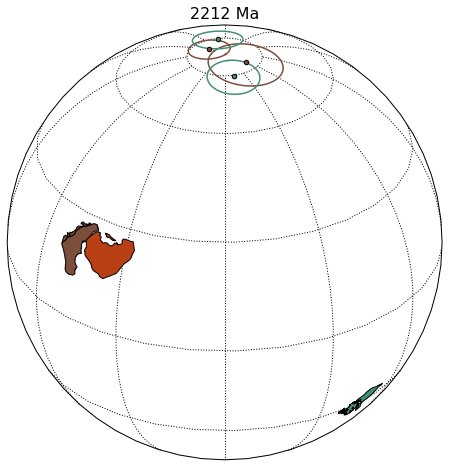

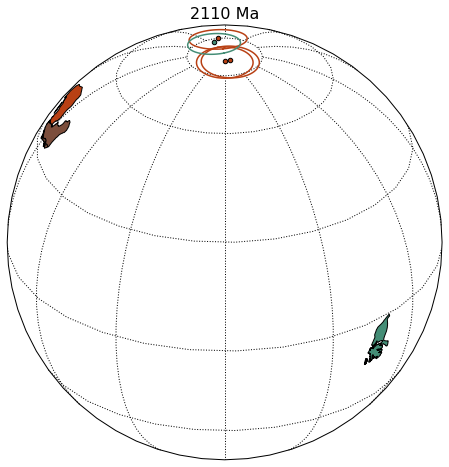

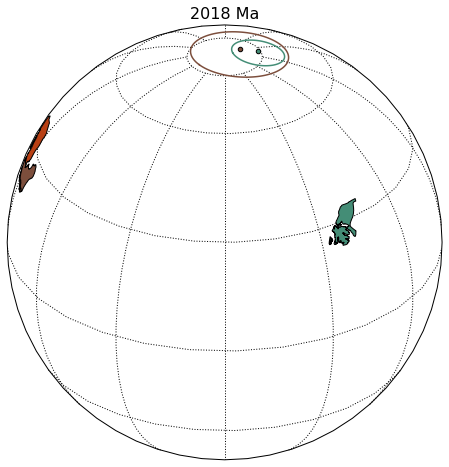

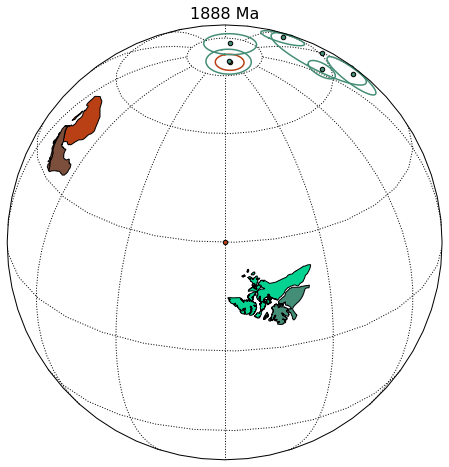

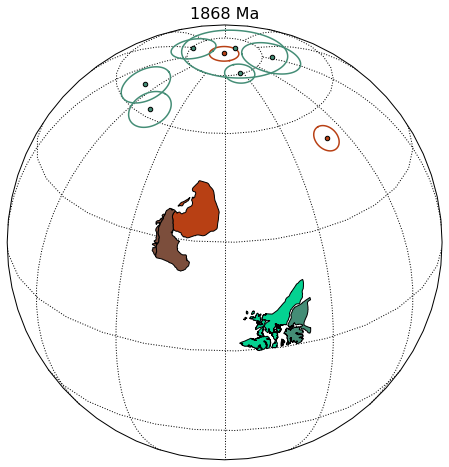

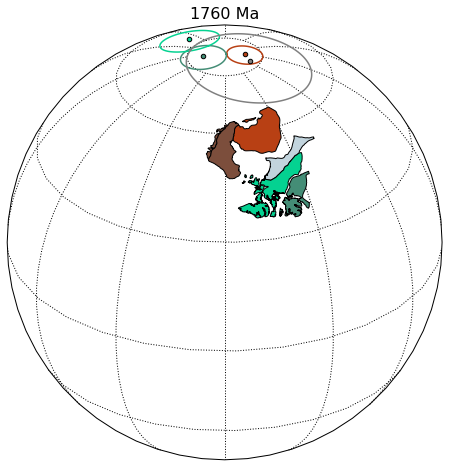

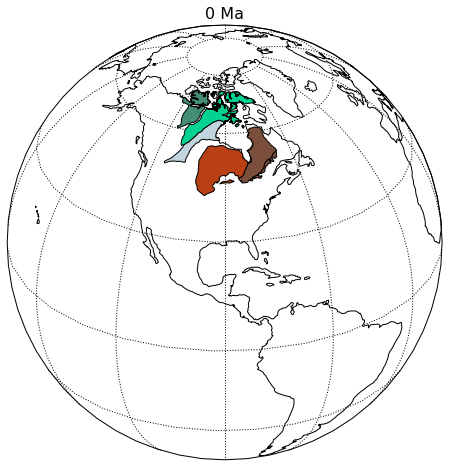

In [12]:
recon_times = [2212,2110,2018,1888,1868,1760,0]
central_longitudes = [90,90,90,90,90,90,-90]

#10043 is Superior(East)
poles_10043 = Laurentia_poles[Laurentia_poles.Plate_ID == 10043]
rotations_10043 = pd.read_csv('visualizations/reconstructions/euler_rotations_10043.csv')

#10023 is Superior(East)
poles_10023 = Laurentia_poles[Laurentia_poles.Plate_ID == 10023]
rotations_10023 = pd.read_csv('visualizations/reconstructions/euler_rotations_10023.csv')

#10041 is Slave
poles_10041 = Laurentia_poles[Laurentia_poles.Plate_ID == 10041]
rotations_10041 = pd.read_csv('visualizations/reconstructions/euler_rotations_10041.csv')

#10640 is Rae
poles_10640 = Laurentia_poles[Laurentia_poles.Plate_ID == 10640]
rotations_10640 = pd.read_csv('visualizations/reconstructions/euler_rotations_10640.csv')

#1000 is amalgamated Laurentia
poles_1000 = Laurentia_poles[Laurentia_poles.Plate_ID == 1000]
rotations_1000 = pd.read_csv('visualizations/reconstructions/euler_rotations_1000.csv')

for n in range(0,len(recon_times)):

#    ax = make_mollweide_map(central_longitude=central_longitudes[n])
    ax = make_orthographic_map(central_longitude=central_longitudes[n],central_latitude=30)

    shpfilename = 'visualizations/reconstructions/{0}Ma_Laurentia.shp'.format(recon_times[n])

    reader = shpreader.Reader(shpfilename)
    units = reader.records()

    for unit in units:

        if unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
            
            if unit.attributes['PLATE_ID'] == 10043:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#7C4E3C',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if unit.attributes['PLATE_ID'] == 10023:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#B84014',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if unit.attributes['PLATE_ID'] == 10041:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#448D76',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if recon_times[n] < 1950:
                if unit.attributes['PLATE_ID'] == 10640:
                    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                                  facecolor='#04D291',edgecolor='black',
                                  label=unit.attributes['Unit'],zorder=80)
                    
            if recon_times[n] < 1850:
                if unit.attributes['PLATE_ID'] == 10015:
                    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                                  facecolor='#c2d4dd',edgecolor='black',
                                  label=unit.attributes['Unit'],zorder=80)
                    
    if recon_times[n] == 0:
        
        land = NaturalEarthFeature(category='physical', name='land',
                            scale='110m', facecolor=COLORS['land'])

        ax.add_feature(land, facecolor='white',edgecolor='black')
        
                    
    euler_10043 = [rotations_10043.pole_lat[n],rotations_10043.pole_lon[n],rotations_10043.pole_angle[n]]

    selected_poles_10043 = poles_10043[(poles_10043['nominal age'] >= (recon_times[n] - 20)) & (poles_10043['nominal age'] <= (recon_times[n] + 20))]
    for i in selected_poles_10043.index:
        recon_pole = pmag.pt_rot(euler_10043,[selected_poles_10043['PLAT'][i],selected_poles_10043['PLAT'][i]],[selected_poles_10043['PLONG'][i],selected_poles_10043['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10043['A95'][i],color='#7C4E3C')
    
    euler_10023 = [rotations_10023.pole_lat[n],rotations_10023.pole_lon[n],rotations_10023.pole_angle[n]]

    selected_poles_10023 = poles_10023[(poles_10023['nominal age'] >= (recon_times[n] - 20)) & (poles_10023['nominal age'] <= (recon_times[n] + 20))]
    for i in selected_poles_10023.index:
        recon_pole = pmag.pt_rot(euler_10023,[selected_poles_10023['PLAT'][i],selected_poles_10023['PLAT'][i]],[selected_poles_10023['PLONG'][i],selected_poles_10023['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10023['A95'][i],color='#B84014')
        
    euler_10041 = [rotations_10041.pole_lat[n],rotations_10041.pole_lon[n],rotations_10041.pole_angle[n]]

    selected_poles_10041 = poles_10041[(poles_10041['nominal age'] >= (recon_times[n] - 20)) & (poles_10041['nominal age'] <= (recon_times[n] + 20))]
    for i in selected_poles_10041.index:
        recon_pole = pmag.pt_rot(euler_10041,[selected_poles_10041['PLAT'][i],selected_poles_10041['PLAT'][i]],[selected_poles_10041['PLONG'][i],selected_poles_10041['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10041['A95'][i],color='#448D76')
        
    euler_10640 = [rotations_10640.pole_lat[n],rotations_10640.pole_lon[n],rotations_10640.pole_angle[n]]

    selected_poles_10640 = poles_10640[(poles_10640['nominal age'] >= (recon_times[n] - 20)) & (poles_10640['nominal age'] <= (recon_times[n] + 20))]
    for i in selected_poles_10640.index:
        recon_pole = pmag.pt_rot(euler_10640,[selected_poles_10640['PLAT'][i],selected_poles_10640['PLAT'][i]],[selected_poles_10640['PLONG'][i],selected_poles_10640['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10640['A95'][i],color='#04D291')
        
    euler_1000 = [rotations_1000.pole_lat[n],rotations_1000.pole_lon[n],rotations_1000.pole_angle[n]]

    selected_poles_1000 = poles_1000[(poles_1000['nominal age'] >= (recon_times[n] - 20)) & (poles_1000['nominal age'] <= (recon_times[n] + 20))]
    for i in selected_poles_1000.index:
        recon_pole = pmag.pt_rot(euler_1000,[selected_poles_1000['PLAT'][i],selected_poles_1000['PLAT'][i]],[selected_poles_1000['PLONG'][i],selected_poles_1000['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_1000['A95'][i],color='grey')

    plt.title('{0} Ma'.format(recon_times[n]),fontsize=16)
    plt.savefig('visualizations/reconstructions/Superior_Slave_pole20Myr_{0}.svg'.format(recon_times[n]))
    plt.show()

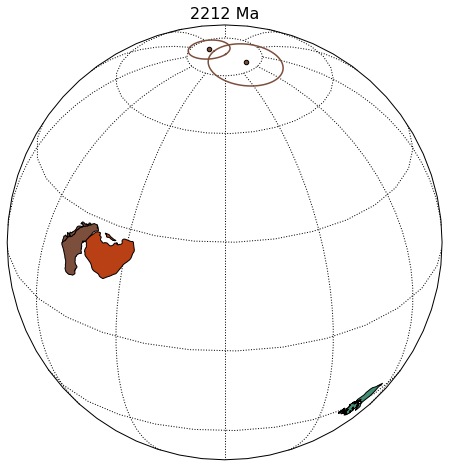

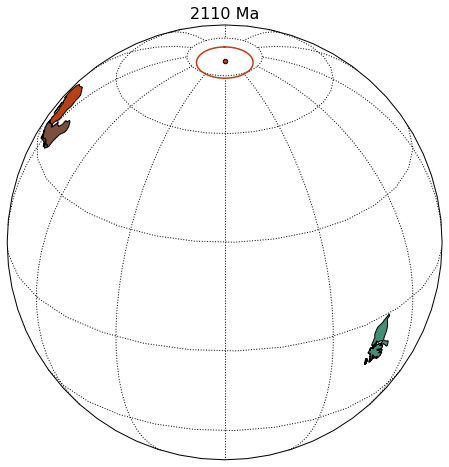

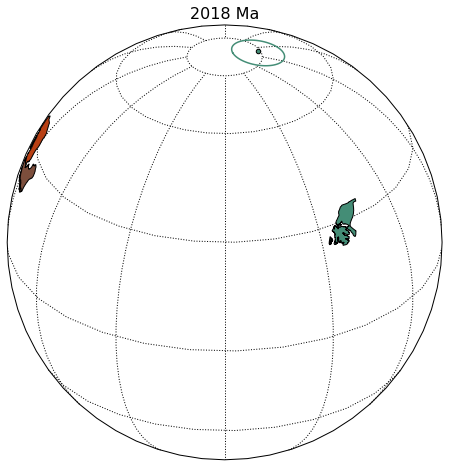

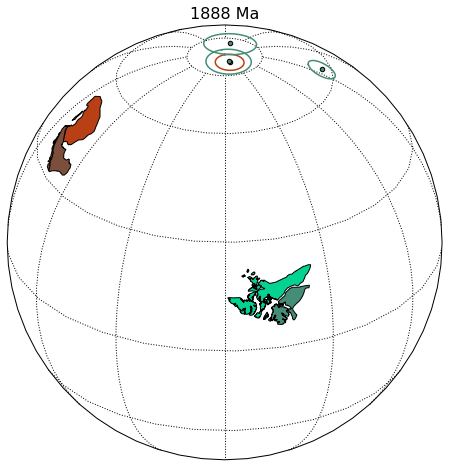

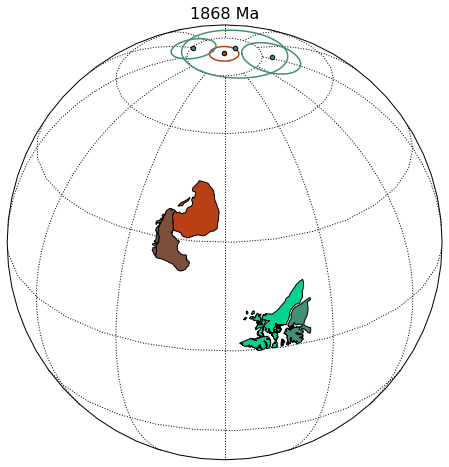

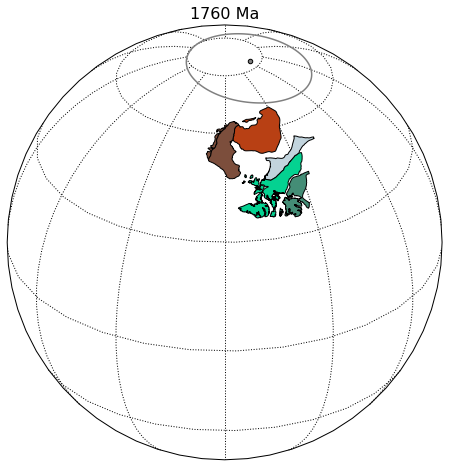

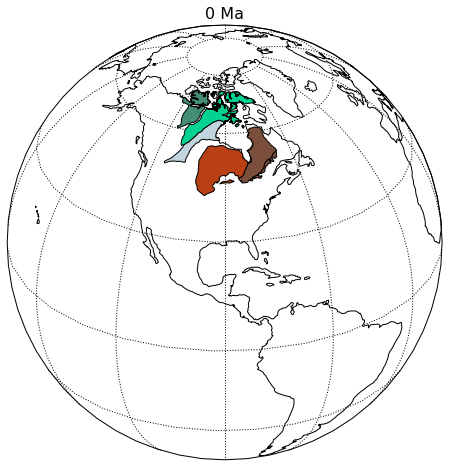

In [13]:
recon_times = [2212,2110,2018,1888,1868,1760,0]
central_longitudes = [90,90,90,90,90,90,-90]

#10043 is Superior(East)
poles_10043 = Laurentia_poles[Laurentia_poles.Plate_ID == 10043]
rotations_10043 = pd.read_csv('visualizations/reconstructions/euler_rotations_10043.csv')

#10023 is Superior(East)
poles_10023 = Laurentia_poles[Laurentia_poles.Plate_ID == 10023]
rotations_10023 = pd.read_csv('visualizations/reconstructions/euler_rotations_10023.csv')

#10041 is Slave
poles_10041 = Laurentia_poles[Laurentia_poles.Plate_ID == 10041]
rotations_10041 = pd.read_csv('visualizations/reconstructions/euler_rotations_10041.csv')

#10640 is Rae
poles_10640 = Laurentia_poles[Laurentia_poles.Plate_ID == 10640]
rotations_10640 = pd.read_csv('visualizations/reconstructions/euler_rotations_10640.csv')

#1000 is amalgamated Laurentia
poles_1000 = Laurentia_poles[Laurentia_poles.Plate_ID == 1000]
rotations_1000 = pd.read_csv('visualizations/reconstructions/euler_rotations_1000.csv')

for n in range(0,len(recon_times)):

#    ax = make_mollweide_map(central_longitude=central_longitudes[n])
    ax = make_orthographic_map(central_longitude=central_longitudes[n],central_latitude=30)

    shpfilename = 'visualizations/reconstructions/{0}Ma_Laurentia.shp'.format(recon_times[n])

    reader = shpreader.Reader(shpfilename)
    units = reader.records()

    for unit in units:

        if unit.attributes['Unit'] == '> 2.5 Ga Archean crust':
            
            if unit.attributes['PLATE_ID'] == 10043:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#7C4E3C',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if unit.attributes['PLATE_ID'] == 10023:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#B84014',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if unit.attributes['PLATE_ID'] == 10041:
                ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                              facecolor='#448D76',edgecolor='black',
                              label=unit.attributes['Unit'],zorder=80)
                
            if recon_times[n] < 1950:
                if unit.attributes['PLATE_ID'] == 10640:
                    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                                  facecolor='#04D291',edgecolor='black',
                                  label=unit.attributes['Unit'],zorder=80)
                    
            if recon_times[n] < 1850:
                if unit.attributes['PLATE_ID'] == 10015:
                    ax.add_geometries(unit.geometry, ccrs.PlateCarree(),
                                  facecolor='#c2d4dd',edgecolor='black',
                                  label=unit.attributes['Unit'],zorder=80)
                    
    if recon_times[n] == 0:
        
        land = NaturalEarthFeature(category='physical', name='land',
                            scale='110m', facecolor=COLORS['land'])

        ax.add_feature(land, facecolor='white',edgecolor='black')
        
                    
    euler_10043 = [rotations_10043.pole_lat[n],rotations_10043.pole_lon[n],rotations_10043.pole_angle[n]]

    selected_poles_10043 = poles_10043[(poles_10043['nominal age'] >= (recon_times[n] - 10)) & (poles_10043['nominal age'] <= (recon_times[n] + 10))]
    for i in selected_poles_10043.index:
        recon_pole = pmag.pt_rot(euler_10043,[selected_poles_10043['PLAT'][i],selected_poles_10043['PLAT'][i]],[selected_poles_10043['PLONG'][i],selected_poles_10043['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10043['A95'][i],color='#7C4E3C')
    
    euler_10023 = [rotations_10023.pole_lat[n],rotations_10023.pole_lon[n],rotations_10023.pole_angle[n]]

    selected_poles_10023 = poles_10023[(poles_10023['nominal age'] >= (recon_times[n] - 10)) & (poles_10023['nominal age'] <= (recon_times[n] + 10))]
    for i in selected_poles_10023.index:
        recon_pole = pmag.pt_rot(euler_10023,[selected_poles_10023['PLAT'][i],selected_poles_10023['PLAT'][i]],[selected_poles_10023['PLONG'][i],selected_poles_10023['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10023['A95'][i],color='#B84014')
        
    euler_10041 = [rotations_10041.pole_lat[n],rotations_10041.pole_lon[n],rotations_10041.pole_angle[n]]

    selected_poles_10041 = poles_10041[(poles_10041['nominal age'] >= (recon_times[n] - 10)) & (poles_10041['nominal age'] <= (recon_times[n] + 10))]
    for i in selected_poles_10041.index:
        recon_pole = pmag.pt_rot(euler_10041,[selected_poles_10041['PLAT'][i],selected_poles_10041['PLAT'][i]],[selected_poles_10041['PLONG'][i],selected_poles_10041['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10041['A95'][i],color='#448D76')
        
    euler_10640 = [rotations_10640.pole_lat[n],rotations_10640.pole_lon[n],rotations_10640.pole_angle[n]]

    selected_poles_10640 = poles_10640[(poles_10640['nominal age'] >= (recon_times[n] - 10)) & (poles_10640['nominal age'] <= (recon_times[n] + 10))]
    for i in selected_poles_10640.index:
        recon_pole = pmag.pt_rot(euler_10640,[selected_poles_10640['PLAT'][i],selected_poles_10640['PLAT'][i]],[selected_poles_10640['PLONG'][i],selected_poles_10640['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_10640['A95'][i],color='#04D291')
        
    euler_1000 = [rotations_1000.pole_lat[n],rotations_1000.pole_lon[n],rotations_1000.pole_angle[n]]

    selected_poles_1000 = poles_1000[(poles_1000['nominal age'] >= (recon_times[n] - 10)) & (poles_1000['nominal age'] <= (recon_times[n] + 10))]
    for i in selected_poles_1000.index:
        recon_pole = pmag.pt_rot(euler_1000,[selected_poles_1000['PLAT'][i],selected_poles_1000['PLAT'][i]],[selected_poles_1000['PLONG'][i],selected_poles_1000['PLONG'][i]])
        pole_recon_lat = recon_pole[0][0]
        pole_recon_lon = recon_pole[1][0]
        ipmag.plot_pole(ax,pole_recon_lon,pole_recon_lat,selected_poles_1000['A95'][i],color='grey')

    plt.title('{0} Ma'.format(recon_times[n]),fontsize=16)
    plt.savefig('visualizations/reconstructions/Superior_Slave_pole10Myr_{0}.svg'.format(recon_times[n]))
    plt.show()

## Comparing Laurentia and Baltica poles

In [14]:
#Leirubakki_Baltica = pd.read_excel('../Data/Leirubakki_Baltica.xlsx')
Baltica_terrane_list = ['Baltica', 'Baltica - Fennoscandia',
       'Baltica - Karelia', 'Baltica-Fennoscandia',
       'Baltica-Fennoscandia-Karelia', 'Baltica-Sarmatia',
       'Baltica-Urals']

In [15]:
Baltica_poles = pd.read_csv('../Data/pole_compilations/Leirubakki_Baltica_poles.csv')

In [16]:
Baltica_Laurentia_Euler = [47.5, 1.5, 49]

for pole in Baltica_poles.index:
    plat, plon = pmag.pt_rot(Baltica_Laurentia_Euler,[Baltica_poles['PLAT'][pole]],[Baltica_poles['PLONG'][pole]])
    Baltica_poles['Laurentia_plat'][pole] = plat[0]
    Baltica_poles['Laurentia_plon'][pole] = plon[0]

#     paleolat = ipmag.lat_from_pole(duluth_lon,duluth_lat,
#                                plon[0],plat[0])
#     Baltica_poles['Duluth_plat'][pole] = paleolat

In [17]:
B_poles_1700_1800 = Baltica_poles[(Baltica_poles['nominal age'] > 1700) & (Baltica_poles['nominal age'] < 1800)]
B_poles_1700_1800

,Terrane,ROCKNAME,RESULT#,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Laurentia_plon,Laurentia_plat,Duluth_plat,Unnamed: 48,Unnamed: 49
31,Baltica-Sarmatia,Volyn-Dniestr-Bug intrusions,new,Group E,NaN,0.0,50.0,29.6,5.0,86.0,226.8,29.9,29.9,26.6,15.1,10.7,163.2,10.2,10.2,10.2,0or100,4,1,1,1,1,1,1,0,1,0,1,5,B,1722,1710,1734,"1722 ± 12, 1722 ± 12",Volyn-Dniestr-Bug intrusions,"Elming, S.-Ã…., Shumlyanskyy, L., Kravchenko, ...",2010,Precambrian Res.,178,119-135,Proterozoic Basic dykes in the Ukrainian Shiel...,206.102557,8.859357,NaN,NaN,NaN
32,Baltica-Fennoscandia,MEAN Ropruchey sill,NEW,mean of 4 sites from Fedotova+99 and Damm+97,NaN,100.0,61.4,35.3,4.0,30.0,358.8,20.1,20.1,100.3,9.2,39.1,217.0,8.6,8.6,8.6,0or100,4,1,1,1,1,1,1,0,1,0,1,5,B,1751,1748,1754,"1751±3, U-Pb 1751±3; Lubnina+12",Ropruchey sill,"Fedotova,M.A., Khramov,A.N., Pisakin,B.N., Pri...",1999,Geophys.J.Int.,137,691-712,Early Proterozoic palaeomagnetism: new results...,262.417331,11.166380,NaN,NaN,NaN
33,Baltica-Sarmatia,Volyn-Dniestr-Bug intrusions,new,Group C +D,C+,0.0,50.6,28.6,11.0,1000.0,34.9,-10.6,10.6,1000.0,0.1,26.5,169.1,3.9,3.9,3.9,mixed,4,1,1,1,1,1,1,1,1,1,1,7,A,1755,1740,1770,"1740-1770,",Volyn-Dniestr-Bug intrusions,"Elming, S.-Ã…., Shumlyanskyy, L., Kravchenko, ...",2010,Precambrian Res.,178,119-135,Proterozoic Basic dykes in the Ukrainian Shiel...,219.917216,18.929056,NaN,NaN,NaN
34,Baltica-Fennoscandia,Shoksha Sandstones,8681,NaN,"G*,Rc",100.0,61.3,33.8,36.0,61.0,354.3,21.6,21.6,22.3,5.2,39.7,221.1,2.9,5.5,4.0,42,4,1,1,1,1,1,1,1,1,1,1,7,B,1775,1750,1800,"pre-1770±12, pre-1770±12, base of formation",Shoksha Sandstones,"Pisarevsky, S.A., Sokolov, S.J.",2001,Geophys.J.Int.,146,531-538,The magnetostratigraphyand a 1780 Ma palaeomag...,265.676677,10.770249,NaN,NaN,NaN
35,Baltica-Fennoscandia,Småland intrusives -C,100369,NaN,C*+,0.0,57.1,15.7,11.0,58.0,9.3,25.1,25.1,30.0,8.5,45.7,182.7,8.0,8.0,8.0,10,4,1,1,1,1,1,1,1,1,1,1,7,A,1777,1769,1784,"1776.5, 1780 ± 3, 1776 +8/-7",Småland intrusives -C,"Pisarevsky, S., Bylund, G.",2010,Am. J. Sci.,310,1168-1186,Paleomagnetism of 1780-1770 Ma mafic and compo...,241.701779,28.441450,NaN,NaN,NaN
36,Baltica-Fennoscandia,Hoting gabbro,NaN,NaN,C*+,0.0,64.2,16.2,5.0,47.0,331.9,37.5,37.5,41.0,12.1,43.0,233.3,10.9,10.9,10.9,0or100,4,1,1,1,1,1,1,1,1,0,1,6,A,1786,1776,1796,"U-Pb: 1786+-10, Ar-Ar bt:1648+-12, U-Pb: 1786+...",Hoting gabbro,"Elming, S.Å., Moakhar, M.O., Layer, P and Dona...",2009,Geoph. J. Int.,179,59-78,Uplift deduced…,275.537411,11.794951,NaN,NaN,NaN


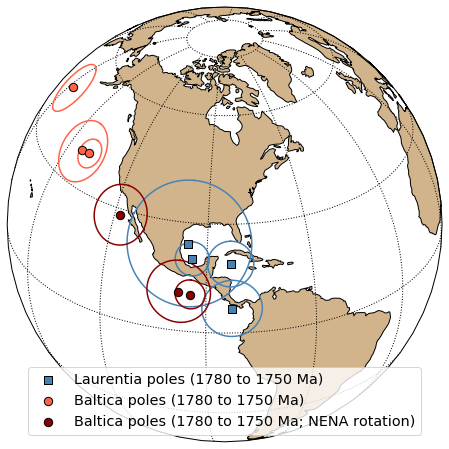

In [18]:
map_axis = ipmag.make_orthographic_map(central_longitude=275,central_latitude=30)

ipmag.plot_pole(map_axis,Dubawnt_pole['PLONG'].values[0],Dubawnt_pole['PLAT'].values[0],Dubawnt_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50,label='Laurentia poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Jan_pole['PLONG'].values[0],Jan_pole['PLAT'].values[0],Jan_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Cleaver_pole['PLONG'].values[0],Cleaver_pole['PLAT'].values[0],Cleaver_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][32],Baltica_poles['PLAT'][32],Baltica_poles['A95'][32],color='tomato',
                markersize=70,label='Baltica poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][34],Baltica_poles['PLAT'][34],Baltica_poles['A95'][34],color='tomato',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][35],Baltica_poles['PLAT'][35],Baltica_poles['A95'][35],color='tomato',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][36],Baltica_poles['PLAT'][36],Baltica_poles['A95'][36],color='tomato',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][32],Baltica_poles['Laurentia_plat'][32],Baltica_poles['A95'][32],color='darkred',
                markersize=70,label='Baltica poles (1780 to 1750 Ma; NENA rotation)')
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][34],Baltica_poles['Laurentia_plat'][34],Baltica_poles['A95'][34],color='darkred',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][35],Baltica_poles['Laurentia_plat'][35],Baltica_poles['A95'][35],color='darkred',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][36],Baltica_poles['Laurentia_plat'][36],Baltica_poles['A95'][36],color='darkred',markersize=50)

plt.legend(fontsize='x-large',loc='lower center')
plt.show()

In [19]:
def get_craton_XYs(gpml, plateIDs):
    """
    Get XY coordinates of a plate polygon from a .gpml.
    
    Parameters
    ----------
    gpml : string
        Path to .gpml file.
        
    plateIDs : list
        Of plateIDs.
    """
    # namespace dictionary
    ns = {'gpml':'http://www.gplates.org/gplates',
          'gml':'http://www.opengis.net/gml'}
    
    # initial parse
    tree = ET.parse(gpml)
    root = tree.getroot()
    
    # storage
    Xs = []
    Ys = []
    
    # iterate through featureMembers
    for featureMember in root.findall('gml:featureMember',ns):
        
        # get child
        for child in featureMember:
            slice_ind = child.tag.find('}')
            child_root = 'gpml:' + child.tag[slice_ind+1:]
        
        # check plateID
        plateID_path = child_root + '/gpml:reconstructionPlateId/gpml:ConstantValue/gpml:value'
        feature_plateID = int(featureMember.find(plateID_path,ns).text)
        if feature_plateID in plateIDs:
            
            if featureMember.find(child_root + '/gpml:outlineOf', ns)!=None:
                polygon_root = child_root + '/gpml:outlineOf'
            elif featureMember.find(child_root + '/gpml:boundary', ns)!=None:
                polygon_root = child_root + '/gpml:boundary'
            elif featureMember.find(child_root + '/gpml:unclassifiedGeometry', ns)!=None:
                polygon_root = child_root + '/gpml:unclassifiedGeometry'
            elif featureMember.find(child_root + '/gpml:centerLineOf', ns)!=None:
                polygon_root = child_root + '/gpml:centerLineOf'
            else:
                raise Exception('polygon_root undefined.')
            
            # get coordinates
            posList_path = polygon_root + '/gpml:ConstantValue/gpml:value/gml:Polygon/gml:exterior/gml:LinearRing/gml:posList'
            feature_posList = np.fromstring(featureMember.find(posList_path,ns).text, dtype=float, sep=' ')
            
            # split into lat and lon
            lat_inds = np.arange(0, len(feature_posList), 2, dtype=int)
            lon_inds = np.arange(1, len(feature_posList), 2, dtype=int)
            
            feature_lat = feature_posList[lat_inds]
            feature_lon = feature_posList[lon_inds]
            
            Xs.append(feature_lon)
            Ys.append(feature_lat)
            
    return Xs, Ys

def craton_plot(ax, gpml, plateIDs, Eulers, edgecolor, facecolor, alpha):
    """
    Plot cratons with rotation.
    
    Parameters
    ----------
    ax : map axis
        On which to plot.
    gpml : gpml file path
    plateIDs : list
        Of plateIDs.
        
    Eulers : list of lists
        Of Euler rotation parameters - if more than one given,
        the rotations will be additive.
    """
    # get cratons from .gpml
     
    Xs, Ys = get_craton_XYs(gpml, plateIDs)
    
    # rotate cratons
    rotated_Xs = []
    rotated_Ys = []
    for i in range(len(Xs)):
        rotated_X = np.array([])
        rotated_Y = np.array([])
        for j in range(len(Xs[i])):
            this_X = [Xs[i][j]]
            this_Y = [Ys[i][j]]
            for k in range(len(Eulers)):
                this_Y, this_X = pmag.pt_rot(Eulers[k], this_Y, this_X)
            rotated_X = np.append(rotated_X, this_X)
            rotated_Y = np.append(rotated_Y, this_Y)
        rotated_Xs.append(rotated_X)
        rotated_Ys.append(rotated_Y)
        
    # add cratons
    for i in range(len(rotated_Xs)):
        XY = np.stack([rotated_Xs[i][::-1],rotated_Ys[i][::-1]],axis=1)
        poly_edge = patches.Polygon(XY,
                                    edgecolor=edgecolor,facecolor='none',
                                    transform=ccrs.Geodetic())
        poly_face = patches.Polygon(XY,
                                    edgecolor='none',facecolor=facecolor,alpha=alpha,
                                    transform=ccrs.Geodetic())
        ax.add_patch(poly_face)
        ax.add_patch(poly_edge)

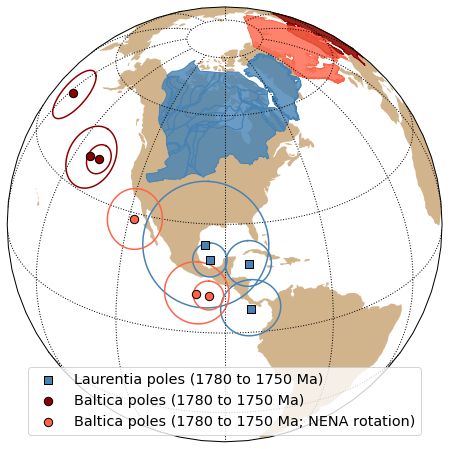

In [20]:
gpml = '../data/pole_compilations/shapes_cratons_paleoproterozoic.gpml'

Greenland_Euler = [67.5,-118.5,-13.8] #[lat,lon,CCW angle]
Baltica_Euler = [75.8, -95.82, -59.16]
Baltica_Laurentia_no_rotation = [0, 0, 0]
Euler_107 = [-69.79, 101.72, 5.98]

map_axis = ipmag.make_orthographic_map(add_land=True,land_edge_color=None,
                                       central_longitude=270,central_latitude=30)

ipmag.plot_pole(map_axis,Dubawnt_pole['PLONG'].values[0],Dubawnt_pole['PLAT'].values[0],Dubawnt_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50,label='Laurentia poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Jan_pole['PLONG'].values[0],Jan_pole['PLAT'].values[0],Jan_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Cleaver_pole['PLONG'].values[0],Cleaver_pole['PLAT'].values[0],Cleaver_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][32],Baltica_poles['PLAT'][32],Baltica_poles['A95'][32],color='darkred',
                markersize=70,label='Baltica poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][34],Baltica_poles['PLAT'][34],Baltica_poles['A95'][34],color='darkred',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][35],Baltica_poles['PLAT'][35],Baltica_poles['A95'][35],color='darkred',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][36],Baltica_poles['PLAT'][36],Baltica_poles['A95'][36],color='tomato',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][32],Baltica_poles['Laurentia_plat'][32],Baltica_poles['A95'][32],color='tomato',
                markersize=70,label='Baltica poles (1780 to 1750 Ma; NENA rotation)')
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][34],Baltica_poles['Laurentia_plat'][34],Baltica_poles['A95'][34],color='tomato',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][35],Baltica_poles['Laurentia_plat'][35],Baltica_poles['A95'][35],color='tomato',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][36],Baltica_poles['Laurentia_plat'][36],Baltica_poles['A95'][36],color='darkred',markersize=50)

craton_plot(map_axis, gpml, [101], [[0,0,0]], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [102], [Greenland_Euler], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [107], [Euler_107], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [302], [Baltica_Laurentia_no_rotation], 'darkred', 'darkred', 0.8)
craton_plot(map_axis, gpml, [302], [Baltica_Laurentia_Euler], 'tomato', 'tomato', 0.8)

plt.legend(fontsize='x-large',loc='lower center')
plt.savefig('visualizations/pole_comparison_Laurentia_Baltica_a.pdf')
plt.show()

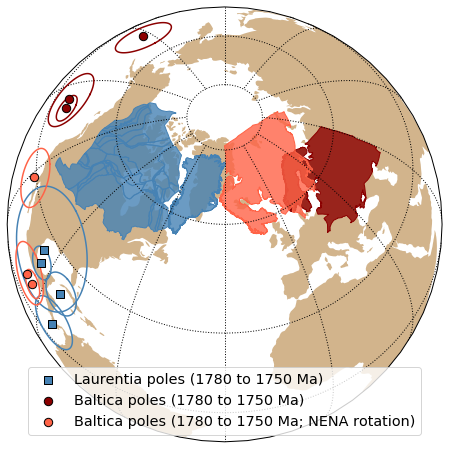

In [21]:
gpml = '../data/pole_compilations/shapes_cratons_paleoproterozoic.gpml'

Greenland_Euler = [67.5,-118.5,-13.8] #[lat,lon,CCW angle]
Baltica_Euler = [75.8, -95.82, -59.16]
Baltica_Laurentia_no_rotation = [0, 0, 0]
Euler_107 = [-69.79, 101.72, 5.98]

map_axis = ipmag.make_orthographic_map(add_land=True,land_edge_color=None,
                                       central_longitude=330,central_latitude=60)

ipmag.plot_pole(map_axis,Dubawnt_pole['PLONG'].values[0],Dubawnt_pole['PLAT'].values[0],Dubawnt_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50,label='Laurentia poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Jan_pole['PLONG'].values[0],Jan_pole['PLAT'].values[0],Jan_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Cleaver_pole['PLONG'].values[0],Cleaver_pole['PLAT'].values[0],Cleaver_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][32],Baltica_poles['PLAT'][32],Baltica_poles['A95'][32],color='darkred',
                markersize=70,label='Baltica poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][34],Baltica_poles['PLAT'][34],Baltica_poles['A95'][34],color='darkred',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][35],Baltica_poles['PLAT'][35],Baltica_poles['A95'][35],color='darkred',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['PLONG'][36],Baltica_poles['PLAT'][36],Baltica_poles['A95'][36],color='tomato',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][32],Baltica_poles['Laurentia_plat'][32],Baltica_poles['A95'][32],color='tomato',
                markersize=70,label='Baltica poles (1780 to 1750 Ma; NENA rotation)')
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][34],Baltica_poles['Laurentia_plat'][34],Baltica_poles['A95'][34],color='tomato',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][35],Baltica_poles['Laurentia_plat'][35],Baltica_poles['A95'][35],color='tomato',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][36],Baltica_poles['Laurentia_plat'][36],Baltica_poles['A95'][36],color='darkred',markersize=50)

craton_plot(map_axis, gpml, [101], [[0,0,0]], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [102], [Greenland_Euler], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [107], [Euler_107], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [302], [Baltica_Laurentia_no_rotation], 'darkred', 'darkred', 0.8)
craton_plot(map_axis, gpml, [302], [Baltica_Laurentia_Euler], 'tomato', 'tomato', 0.8)

plt.legend(fontsize='x-large',loc='lower center')
plt.savefig('visualizations/pole_comparison_Laurentia_Baltica_b.pdf')
plt.show()

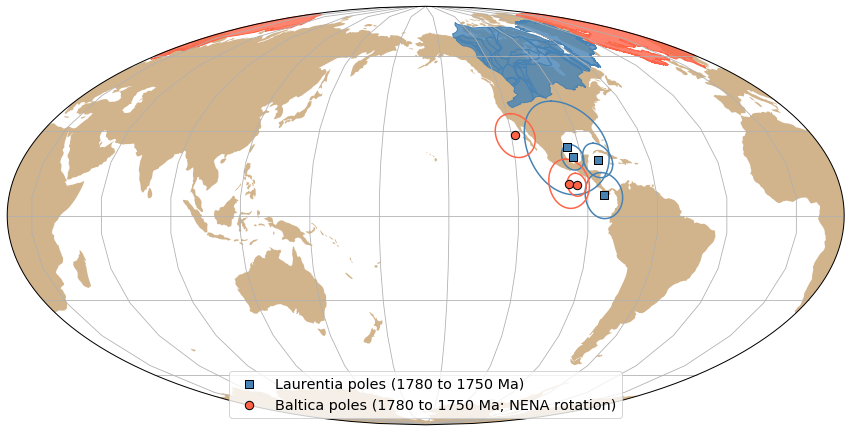

In [22]:
gpml = '../data/pole_compilations/shapes_cratons_paleoproterozoic.gpml'

Greenland_Euler = [67.5,-118.5,-13.8] #[lat,lon,CCW angle]
Baltica_Euler = [75.8, -95.82, -59.16]
Baltica_Laurentia_no_rotation = [0, 0, 0]
Euler_107 = [-69.79, 101.72, 5.98]

map_axis = ipmag.make_mollweide_map(figsize=(15,15),add_land=True,land_edge_color=None,
                                       central_longitude=200)

ipmag.plot_pole(map_axis,Dubawnt_pole['PLONG'].values[0],Dubawnt_pole['PLAT'].values[0],Dubawnt_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50,label='Laurentia poles (1780 to 1750 Ma)')
ipmag.plot_pole(map_axis,NED_pole['dec'],NED_pole['inc'],NED_pole['alpha95'],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Jan_pole['PLONG'].values[0],Jan_pole['PLAT'].values[0],Jan_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)
ipmag.plot_pole(map_axis,Cleaver_pole['PLONG'].values[0],Cleaver_pole['PLAT'].values[0],Cleaver_pole['A95'].values[0],
                marker='s',color='steelblue',markersize=50)

ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][32],Baltica_poles['Laurentia_plat'][32],Baltica_poles['A95'][32],color='tomato',
                markersize=70,label='Baltica poles (1780 to 1750 Ma; NENA rotation)')
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][34],Baltica_poles['Laurentia_plat'][34],Baltica_poles['A95'][34],color='tomato',markersize=70)
ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][35],Baltica_poles['Laurentia_plat'][35],Baltica_poles['A95'][35],color='tomato',markersize=70)
#ipmag.plot_pole(map_axis,Baltica_poles['Laurentia_plon'][36],Baltica_poles['Laurentia_plat'][36],Baltica_poles['A95'][36],color='darkred',markersize=50)

craton_plot(map_axis, gpml, [101], [[0,0,0]], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [102], [Greenland_Euler], 'steelblue', 'steelblue', 0.8)
craton_plot(map_axis, gpml, [107], [Euler_107], 'steelblue', 'steelblue', 0.8)
#craton_plot(map_axis, gpml, [302], [Baltica_Laurentia_no_rotation], 'darkred', 'darkred', 0.8)
craton_plot(map_axis, gpml, [302], [Baltica_Laurentia_Euler], 'tomato', 'tomato', 0.8)

plt.legend(fontsize='x-large',loc='lower center')
plt.show()

In [23]:
Baltica_poles = Baltica_poles[Baltica_poles.Terrane != 'Baltica-Sarmatia']

Baltica_poles_1780_1100 = Baltica_poles[(Baltica_poles['nominal age'] < 1780) & (Baltica_poles['nominal age'] > 1108)]
Laurentia_poles_1780_1100 = Laurentia_poles[(Laurentia_poles['nominal age'] < 1780) & (Laurentia_poles['nominal age'] > 1108)]

Baltica_poles_1780_1100_A = Baltica_poles_1780_1100[(Baltica_poles_1780_1100['Grade'] == 'A')]
Laurentia_poles_1780_1100_A = Laurentia_poles_1780_1100[(Laurentia_poles_1780_1100['Grade'] == 'A')]

In [24]:
Baltica_poles_1780_1100.tail(4)

,Terrane,ROCKNAME,RESULT#,COMPONENT,TESTS,TILT,SLAT,SLONG,B,N,DEC,INC,abs(I),KD,ED95,PLAT,PLONG,DP,DM,A95,%REV,DEMAGCODE,40,24,10,16,2,3,4,5,6,7,Q(7),Grade,nominal age,lomagage,himagage,REF/method,ROCKNAME.1,POLE AUTHORS,YEAR,JOURNAL,VOLUME,VPAGES,TITLE,Laurentia_plon,Laurentia_plat,Duluth_plat,Unnamed: 48,Unnamed: 49
30,Baltica - Fennoscandia,Häme dyke swarm,13300,NaN,"C+, R-",0.0,61.4,25.1,11.0,45.0,355.6,-9.1,9.1,8.6,16.6,23.6,209.8,8.5,16.8,14.7,mixed,AF+TH,1,1,0,0,0,1,1,1,1,0,5,B,1647,1633,1661,"1642 ±2, 1647 ± 14 (Salminen et al., 2017); 1...",Häme dykes,"Salminen, J., Klein, R., Veikkolainen, T., Mer...",2017,Precambrian Res.,288,1-22,Mesoproterozoic geomagnetic reversal asymmetry...,251.271990,-1.273844,NaN,NaN,NaN
32,Baltica-Fennoscandia,MEAN Ropruchey sill,NEW,mean of 4 sites from Fedotova+99 and Damm+97,NaN,100.0,61.4,35.3,4.0,30.0,358.8,20.1,20.1,100.3,9.2,39.1,217.0,8.6,8.6,8.6,0or100,4,1,1,1,1,1,1,0,1,0,1,5,B,1751,1748,1754,"1751±3, U-Pb 1751±3; Lubnina+12",Ropruchey sill,"Fedotova,M.A., Khramov,A.N., Pisakin,B.N., Pri...",1999,Geophys.J.Int.,137,691-712,Early Proterozoic palaeomagnetism: new results...,262.417331,11.166380,NaN,NaN,NaN
34,Baltica-Fennoscandia,Shoksha Sandstones,8681,NaN,"G*,Rc",100.0,61.3,33.8,36.0,61.0,354.3,21.6,21.6,22.3,5.2,39.7,221.1,2.9,5.5,4.0,42,4,1,1,1,1,1,1,1,1,1,1,7,B,1775,1750,1800,"pre-1770±12, pre-1770±12, base of formation",Shoksha Sandstones,"Pisarevsky, S.A., Sokolov, S.J.",2001,Geophys.J.Int.,146,531-538,The magnetostratigraphyand a 1780 Ma palaeomag...,265.676677,10.770249,NaN,NaN,NaN
35,Baltica-Fennoscandia,Småland intrusives -C,100369,NaN,C*+,0.0,57.1,15.7,11.0,58.0,9.3,25.1,25.1,30.0,8.5,45.7,182.7,8.0,8.0,8.0,10,4,1,1,1,1,1,1,1,1,1,1,7,A,1777,1769,1784,"1776.5, 1780 ± 3, 1776 +8/-7",Småland intrusives -C,"Pisarevsky, S., Bylund, G.",2010,Am. J. Sci.,310,1168-1186,Paleomagnetism of 1780-1770 Ma mafic and compo...,241.701779,28.441450,NaN,NaN,NaN


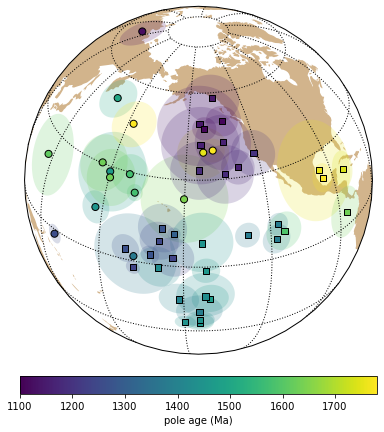

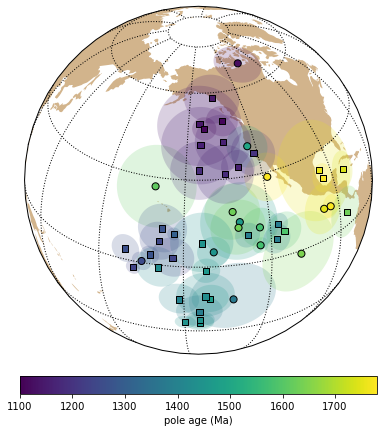

In [25]:
# map_axis = ipmag.make_mollweide_map(figsize=(15,15),add_land=True,land_edge_color=None,
#                                        central_longitude=200)

map_axis = ipmag.make_orthographic_map(add_land=True,land_edge_color=None,
                                       central_longitude=215,central_latitude=30)
ipmag.plot_poles_colorbar(map_axis,Baltica_poles_1780_1100['PLONG'].tolist(),Baltica_poles_1780_1100['PLAT'].tolist(),
                          Baltica_poles_1780_1100['A95'].tolist(),Baltica_poles_1780_1100['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=50,outline=False,filled_pole=True,fill_alpha=0.2)
ipmag.plot_poles_colorbar(map_axis,Laurentia_poles_1780_1100['PLONG'].tolist(),Laurentia_poles_1780_1100['PLAT'].tolist(),
                          Laurentia_poles_1780_1100['A95'].tolist(),Laurentia_poles_1780_1100['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=40,outline=False,filled_pole=True,fill_alpha=0.2,marker='s',colorbar=False)
plt.savefig('visualizations/pole_comparison_Laurentia_Baltica_c.pdf')
plt.show()

map_axis = ipmag.make_orthographic_map(add_land=True,land_edge_color=None,
                                       central_longitude=215,central_latitude=30)
ipmag.plot_poles_colorbar(map_axis,Baltica_poles_1780_1100['Laurentia_plon'].tolist(),Baltica_poles_1780_1100['Laurentia_plat'].tolist(),
                          Baltica_poles_1780_1100['A95'].tolist(),Baltica_poles_1780_1100['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=50,outline=False,filled_pole=True,fill_alpha=0.2)
ipmag.plot_poles_colorbar(map_axis,Laurentia_poles_1780_1100['PLONG'].tolist(),Laurentia_poles_1780_1100['PLAT'].tolist(),
                          Laurentia_poles_1780_1100['A95'].tolist(),Laurentia_poles_1780_1100['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=40,outline=False,filled_pole=True,fill_alpha=0.2,marker='s',colorbar=False)
plt.savefig('visualizations/pole_comparison_Laurentia_Baltica_d.pdf')
plt.show()

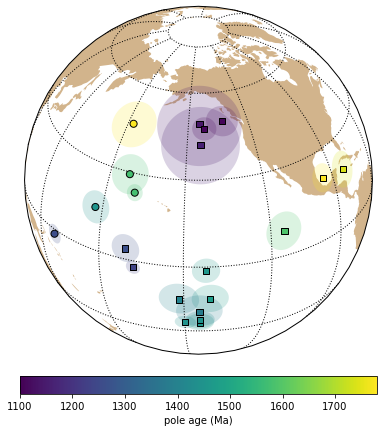

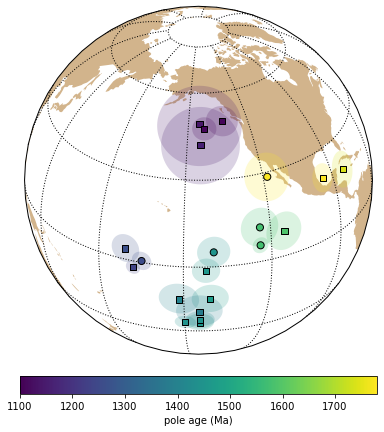

In [26]:
# map_axis = ipmag.make_mollweide_map(figsize=(15,15),add_land=True,land_edge_color=None,
#                                        central_longitude=200)

map_axis = ipmag.make_orthographic_map(add_land=True,land_edge_color=None,
                                       central_longitude=215,central_latitude=30)
ipmag.plot_poles_colorbar(map_axis,Baltica_poles_1780_1100_A['PLONG'].tolist(),Baltica_poles_1780_1100_A['PLAT'].tolist(),
                          Baltica_poles_1780_1100_A['A95'].tolist(),Baltica_poles_1780_1100_A['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=50,outline=False,filled_pole=True,fill_alpha=0.2)
ipmag.plot_poles_colorbar(map_axis,Laurentia_poles_1780_1100_A['PLONG'].tolist(),Laurentia_poles_1780_1100_A['PLAT'].tolist(),
                          Laurentia_poles_1780_1100_A['A95'].tolist(),Laurentia_poles_1780_1100_A['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=40,outline=False,filled_pole=True,fill_alpha=0.2,marker='s',colorbar=False)
plt.savefig('visualizations/pole_comparison_Laurentia_Baltica_e.pdf')
plt.show()

map_axis = ipmag.make_orthographic_map(add_land=True,land_edge_color=None,
                                       central_longitude=215,central_latitude=30)
ipmag.plot_poles_colorbar(map_axis,Baltica_poles_1780_1100_A['Laurentia_plon'].tolist(),Baltica_poles_1780_1100_A['Laurentia_plat'].tolist(),
                          Baltica_poles_1780_1100_A['A95'].tolist(),Baltica_poles_1780_1100_A['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=50,outline=False,filled_pole=True,fill_alpha=0.2)
ipmag.plot_poles_colorbar(map_axis,Laurentia_poles_1780_1100_A['PLONG'].tolist(),Laurentia_poles_1780_1100_A['PLAT'].tolist(),
                          Laurentia_poles_1780_1100_A['A95'].tolist(),Laurentia_poles_1780_1100_A['nominal age'].tolist(),
                          vmin=1100,vmax=1780,markersize=40,outline=False,filled_pole=True,fill_alpha=0.2,marker='s',colorbar=False)
plt.savefig('visualizations/pole_comparison_Laurentia_Baltica_f.pdf')
plt.show()